In [11]:
from transformers import pipeline 
from nltk import sent_tokenize
import nltk
import pandas as pd
import numpy as np

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
#Load model
import torch
model_name = "facebook/bart-large-mnli"
device = 0 if torch.cuda.is_available() else "cpu"

In [8]:
device

'cpu'

In [2]:
def load_model(device):
    theme_classifier = pipeline('zero-shot-classification', 
                                model=model_name, 
                                device=device)
    
    return theme_classifier

In [12]:
import tf_keras as keras
theme_classifier = load_model(device)

Device set to use cpu


In [13]:
theme_list = ["friendship","hope","sacrifice","battle","self development","betrayal","love","dialogue"]

In [14]:
theme_classifier("I am happy", theme_list,
                 multi_label=True)

{'sequence': 'I am happy',
 'labels': ['hope',
  'self development',
  'love',
  'friendship',
  'dialogue',
  'sacrifice',
  'battle',
  'betrayal'],
 'scores': [0.8801074624061584,
  0.7842949628829956,
  0.697178840637207,
  0.5588222146034241,
  0.45043066143989563,
  0.17154011130332947,
  0.000771188351791352,
  6.44458705210127e-05]}

In [10]:
#Load Dataset
from glob import glob
files = glob('D:/me/Project_NLP/data/subtitles/*.ass')

In [11]:
files[:5]

['D:/me/Project_NLP/data/subtitles\\Naruto Season 1 - 01.ass',
 'D:/me/Project_NLP/data/subtitles\\Naruto Season 1 - 02.ass',
 'D:/me/Project_NLP/data/subtitles\\Naruto Season 1 - 03.ass',
 'D:/me/Project_NLP/data/subtitles\\Naruto Season 1 - 04.ass',
 'D:/me/Project_NLP/data/subtitles\\Naruto Season 1 - 05.ass']

In [12]:
with open(files[0], 'r', encoding='utf-8') as file:
    lines = file.readlines()
    lines = lines[27:]  # Skip the first 27 lines (metadata/headers)
    
    # Process each line: split by comma, rejoin from index 9 onward
    lines = [",".join(line.strip().split(',')[9:]) for line in lines]

In [13]:
lines[:2]

['A long time ago, a powerful demon fox\\Nappeared with nine tails.',
 'With its powerful tails,']

In [14]:
lines = [line.replace('\\N',' ') for line in lines]

In [15]:
lines[:2]

['A long time ago, a powerful demon fox appeared with nine tails.',
 'With its powerful tails,']

In [16]:
' '.join(lines[:10])

"A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails, it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can't let it get any closer to our village! One great Ninja was able to imprison the monster, but died in the process. This Ninja was known as… the Fourth Hokage. Naruto!"

In [17]:
#Extract subtitle num
int(files[0].split('-')[-1].split('.')[0].strip())

1

In [18]:
import pandas as pd
from glob import glob

def load_subtitles_dataset(dataset_path):
    # Get all .ass files in the dataset path
    subtitles_paths = glob(dataset_path + '/*.ass')

    scripts = []
    episode_num = []

    for path in subtitles_paths:
        try:
            # Read lines from the current file
            with open(path, 'r', encoding='utf-8') as file:
                lines = file.readlines()
                lines = lines[27:]  # Skip the first 27 lines (metadata/headers)

                # Process each line: split by comma, rejoin from index 9 onward
                lines = [",".join(line.strip().split(',')[9:]) for line in lines]

            # Replace newline markers and join lines into a single script
            lines = [line.replace('\\N', ' ') for line in lines]
            script = " ".join(lines)
            scripts.append(script)

            # Extract episode number from the filename
            episode = int(path.split('-')[-1].split('.')[0].strip())
            episode_num.append(episode)
        except Exception as e:
            print(f"Error processing file {path}: {e}")
            continue

    # Create a DataFrame from the collected data
    df = pd.DataFrame.from_dict({"episode": episode_num, "script": scripts})
    return df

In [19]:
dataset_path = 'D:/me/Project_NLP/data/subtitles'

In [20]:
df = load_subtitles_dataset(dataset_path)

In [21]:
df.head()

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon! Running like a fugitive, Being chased b..."
2,3,"C'mon! Running like a fugitive, Being chased b..."
3,4,"C'mon! Running like a fugitive, Being chased b..."
4,5,"C'mon! Running like a fugitive, Being chased b..."


In [22]:
#Run model

In [23]:
script = df.iloc[0]['script']

In [24]:
script

'A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails, it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can\'t let it get any closer to our village! One great Ninja was able to imprison the monster, but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You\'re really gonna get it this time! I don\'t care! You know your problem? You can\'t do the things I do! Only I can do this! I\'m better than all of you! Believe it! There\'s a problem, sir! Lord Hokage! What is it? Did that Naruto do something again? Yes. He climbed onto the Mountainside Images… And he vandalized and graffitied all over them! Wait! Ha ha… Why should I? Hey, Naruto! How did you suddenly get here, lruka Sensei? The question is what are you doing here when you should be in class now? Now listen, Naruto. You failed the last

In [25]:
script

'A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails, it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can\'t let it get any closer to our village! One great Ninja was able to imprison the monster, but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You\'re really gonna get it this time! I don\'t care! You know your problem? You can\'t do the things I do! Only I can do this! I\'m better than all of you! Believe it! There\'s a problem, sir! Lord Hokage! What is it? Did that Naruto do something again? Yes. He climbed onto the Mountainside Images… And he vandalized and graffitied all over them! Wait! Ha ha… Why should I? Hey, Naruto! How did you suddenly get here, lruka Sensei? The question is what are you doing here when you should be in class now? Now listen, Naruto. You failed the last

In [26]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import sent_tokenize

script_sentences = sent_tokenize(script)
script_sentences[:5]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['A long time ago, a powerful demon fox appeared with nine tails.',
 'With its powerful tails, it could smash mountains and create tidal waves.',
 'A band of Ninjas rose to defend their village from attack.',
 'We have to wait until the Fourth Hokage gets here!',
 "We can't let it get any closer to our village!"]

In [27]:
#Batch Sentence
sentence_batch_size = 20

script_batches = []

for index in range(0,len(script_sentences),sentence_batch_size):
    sent = ' '.join(script_sentences[index:index+sentence_batch_size])
    script_batches.append(sent)
    break

In [28]:
script_batches[:2]

["A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails, it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can't let it get any closer to our village! One great Ninja was able to imprison the monster, but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you! Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again?"]

In [29]:
theme_output = theme_classifier(
    script_batches[:3],
    theme_list,
    multi_label=True
)

In [30]:
theme_output

[{'sequence': "A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails, it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can't let it get any closer to our village! One great Ninja was able to imprison the monster, but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you! Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again?",
  'labels': ['dialogue',
   'betrayal',
   'battle',
   'sacrifice',
   'self development',
   'hope',
   'friendship',
   'love'],
  'scores': [0.9790685176849365,
   0.9497538805007935,
   0.8569777011871338,
   0.7666410207748413,
   0.7487478256225586,
   0.1931648552417755,
 

In [31]:
#wrangle output 
#battle [0.9567,9.03]
#so it will be presenting the batch score next to each other
themes = {}
for output in theme_output:
    for label,score in zip(output['labels'],output['scores']):
        if label not in themes:
            themes[label] = []
            
        themes[label].append(score)

In [32]:
themes

{'dialogue': [0.9790685176849365],
 'betrayal': [0.9497538805007935],
 'battle': [0.8569777011871338],
 'sacrifice': [0.7666410207748413],
 'self development': [0.7487478256225586],
 'hope': [0.1931648552417755],
 'friendship': [0.06438511610031128],
 'love': [0.04339258000254631]}

In [33]:
def get_themes_inference(script):
    script_sentences = sent_tokenize(script)

    # Batch Sentence
    sentence_batch_size=20
    script_batches = []
    for index in range(0,len(script_sentences),sentence_batch_size):
        sent = " ".join(script_sentences[index:index+sentence_batch_size])
        script_batches.append(sent)
    
    # Run Model
    theme_output = theme_classifier(
        script_batches[:2],
        theme_list,
        multi_label=True
    )

    # Wrangle Output 
    themes = {}
    for output in theme_output:
        for label,score in zip(output['labels'],output['scores']):
            if label not in themes:
                themes[label] = []
            themes[label].append(score)

    themes = {key: np.mean(np.array(value)) for key,value in themes.items()}

    return themes

In [34]:
df.head(2)

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon! Running like a fugitive, Being chased b..."


In [35]:
output_themes = df['script'][:2].apply(get_themes_inference)

In [36]:
output_themes

0    {'dialogue': 0.9471538364887238, 'betrayal': 0...
1    {'dialogue': 0.8331516683101654, 'love': 0.231...
Name: script, dtype: object

In [37]:
theme_df = pd.DataFrame(output_themes.tolist())

In [38]:
theme_df.head()

,dialogue,betrayal,battle,sacrifice,self development,hope,friendship,love
0,0.947154,0.821115,0.751901,0.677606,0.797318,0.164627,0.061933,0.030865
1,0.833152,0.385404,0.523823,0.364380,0.356160,0.174275,0.028539,0.231184


In [39]:
df.head(2)

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon! Running like a fugitive, Being chased b..."


In [40]:
df[theme_df.columns] = theme_df

In [41]:
df.head()

,episode,script,dialogue,betrayal,battle,sacrifice,self development,hope,friendship,love
0,1,"A long time ago, a powerful demon fox appeared...",0.947154,0.821115,0.751901,0.677606,0.797318,0.164627,0.061933,0.030865
1,2,"C'mon! Running like a fugitive, Being chased b...",0.833152,0.385404,0.523823,0.364380,0.356160,0.174275,0.028539,0.231184
2,3,"C'mon! Running like a fugitive, Being chased b...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,"C'mon! Running like a fugitive, Being chased b...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"C'mon! Running like a fugitive, Being chased b...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#Visualize output
df = df.drop('dialogue',axis = 1)

In [43]:
theme_output = df.drop(['episode','script'],axis=1).sum().reset_index()
theme_output.columns = ['theme','score']
theme_output

,theme,score
0,betrayal,1.206520
1,battle,1.275725
2,sacrifice,1.041986
3,self development,1.153478
4,hope,0.338902
5,friendship,0.090473
6,love,0.262049


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

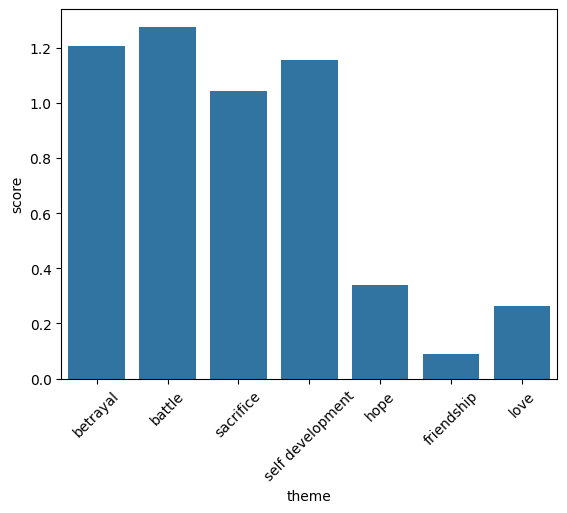

In [45]:
sns.barplot(data = theme_output ,x="theme",y="score" )
plt.xticks(rotation=45)
plt.show()